In [1]:
import os
import torch

os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git



2.0.0


In [5]:
from utils.datasets import *
from utils.trainer import *
from utils.evaluations import *
from utils.models import *
from experiment_runner import *


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
def get_transfer_results(results, experiments):
    for experiment in experiments:
        description = create_description_from_probs(experiment[0], experiment[1])
        transfer_accs = results[description]['average_losses']['source'] - results[description]['average_losses']['target']
        transfer_accs = -np.abs(transfer_accs)
        results[description]['transfer_loss'] = transfer_accs
        
        
    for experiment in experiments:
        description = create_description_from_probs(experiment[0], experiment[1])
        transfer_accs = results[description]['max_source_accs'] - results[description]['max_target_accs']
        transfer_accs = -np.abs(transfer_accs)
        results[description]['max_transfer_accs'] = transfer_accs

    return results

In [56]:

# Experiment parameters

# data params
n_blocks = 2
n_node_features = 2
data_args = {'block_size': 100, 'n_blocks' : n_blocks, 'n_node_features': n_node_features, 
             'root': './structure_sweep'}


# model params
model_args = {'model_type': 'GAT'}
model_hyperparams = {'dim_in' : n_node_features, 'dim_h' : 8, 'dim_out' : n_blocks, 
                     'heads' : 8, 'dann_lambda' : 0.5}
model_args['model_hyperparams'] = model_hyperparams


# optimizer params
optimizer_args = {'lr' : 0.005}

# experiment params
n_runs = 10
n_epochs = 40

# sbm blocks probs
step = 0.10
p = 0.8
q = 0.2
n_experiments = 6

experiments_source_probs = create_prob_sweep(p, q, step_size = step, n_steps = n_experiments)
experiments_target_probs = create_prob_sweep(p, q, step_size = step, n_steps = n_experiments)

from itertools import product
experiment_iterator = product(experiments_source_probs, experiments_target_probs)

results = {}
descriptions = []
experiments = []

for experiment in experiment_iterator:
  experiments.append(experiment)
  description = create_description_from_probs(source_probs = experiment[0], target_probs = experiment[1])
  descriptions.append(description)

  data_args['source_probs'] = experiment[0]
  data_args['target_probs'] = experiment[1]

  results[description] = multiple_runs(experiment_description = description, n_runs = n_runs, n_epochs = n_epochs,
                                       model_args = model_args, data_args = data_args, optimizer_args = optimizer_args)


# store_results(results, descriptions, root = f'/content/drive/MyDrive/graphda_experiments/',
#               experiments_name = 'GAT, prob_sweep')


results = get_transfer_results(results, experiments)


100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


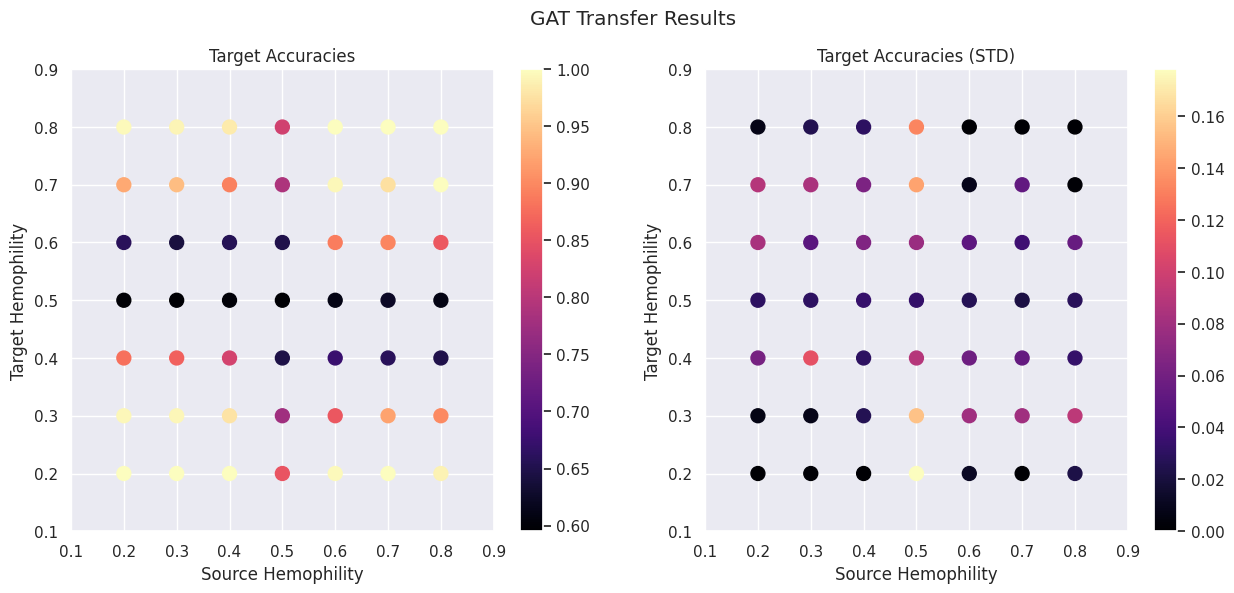

In [59]:
plt.figure(figsize = (15,6))
plt.suptitle('GAT Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'max_target_accs', subtitle = 'Target Accuracies')


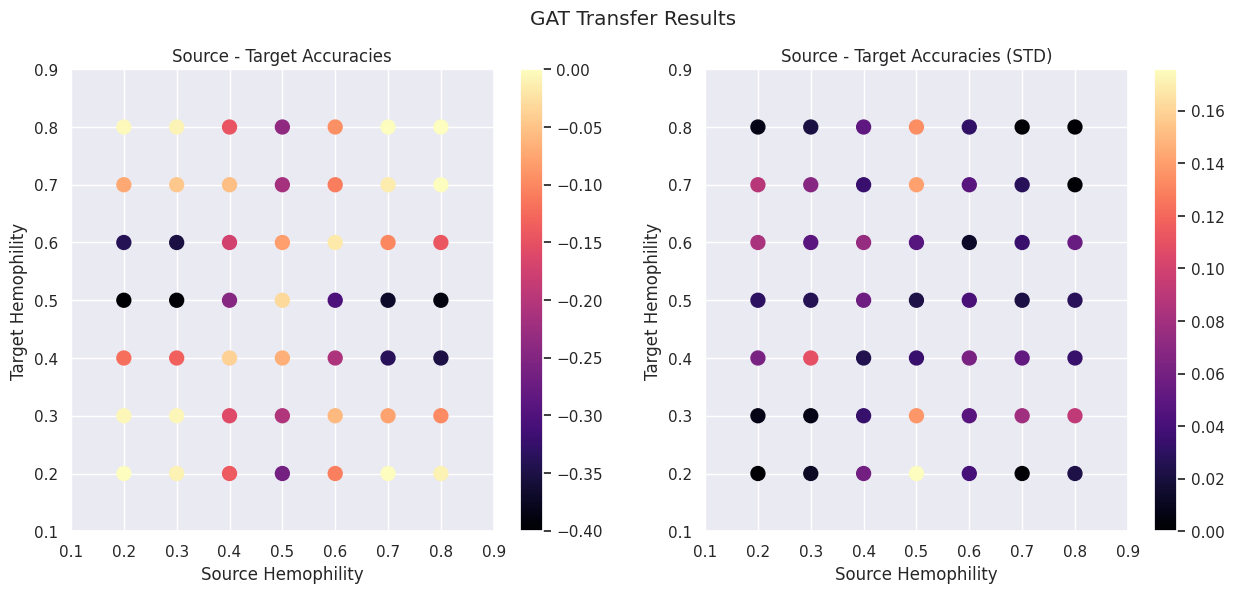

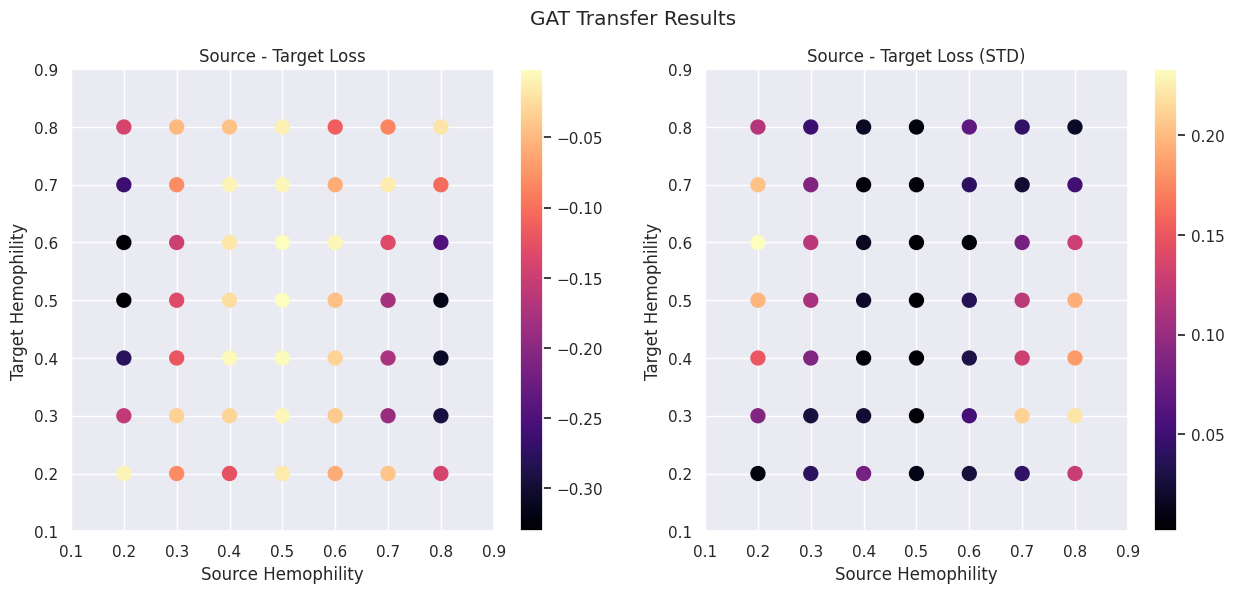

In [60]:
plt.figure(figsize = (15,6))
plt.suptitle('GAT Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'max_transfer_accs', subtitle = 'Source - Target Accuracies')

plt.figure(figsize = (15,6))
plt.suptitle('GAT Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'transfer_loss', subtitle = 'Source - Target Loss')


In [44]:

# Experiment parameters

# data params
n_blocks = 2
n_node_features = 2
data_args = {'block_size': 100, 'n_blocks' : n_blocks, 'n_node_features': n_node_features, 
             'root': './structure_sweep'}


# model params
model_args = {'model_type': 'GCN'}
model_hyperparams = {'num_features' : n_node_features, 'hidden_channels' : 8, 'num_classes' : n_blocks
                     ,'dann_lambda' : 0.5}
model_args['model_hyperparams'] = model_hyperparams


# optimizer params
optimizer_args = {'lr' : 0.02}

# experiment params
n_runs = 10
n_epochs = 25

# sbm blocks probs
step = 0.10
p = 0.8
q = 0.2
n_experiments = 6

experiments_source_probs = create_prob_sweep(p, q, step_size = step, n_steps = n_experiments)
experiments_target_probs = create_prob_sweep(p, q, step_size = step, n_steps = n_experiments)

from itertools import product
experiment_iterator = product(experiments_source_probs, experiments_target_probs)

results = {}
descriptions = []
experiments = []

for experiment in experiment_iterator:
  experiments.append(experiment)
  description = create_description_from_probs(source_probs = experiment[0], target_probs = experiment[1])
  descriptions.append(description)

  data_args['source_probs'] = experiment[0]
  data_args['target_probs'] = experiment[1]

  results[description] = multiple_runs(experiment_description = description, n_runs = n_runs, n_epochs = n_epochs,
                                       model_args = model_args, data_args = data_args, optimizer_args = optimizer_args)


# store_results(results, descriptions, root = f'/content/drive/MyDrive/graphda_experiments/',
#               experiments_name = 'GAT, prob_sweep')


results = get_transfer_results(results, experiments)


100%|██████████| 10/10 [00:01<00:00,  6.16it/s]


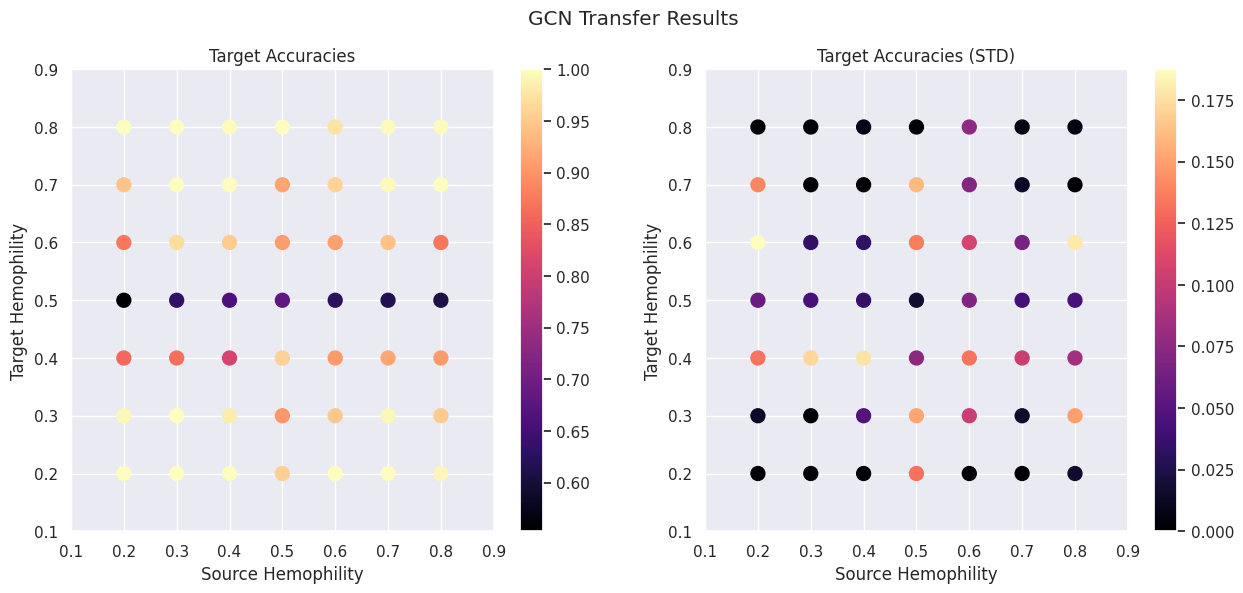

In [49]:
plt.figure(figsize = (15,6))
plt.suptitle('GCN Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'max_target_accs', subtitle = 'Target Accuracies')


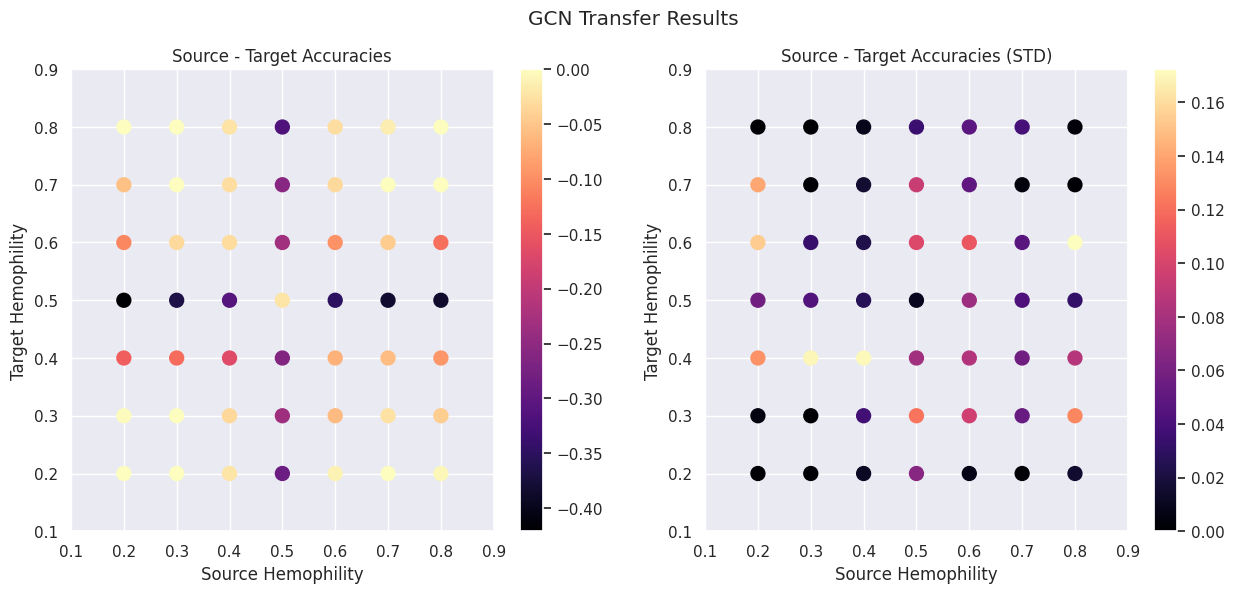

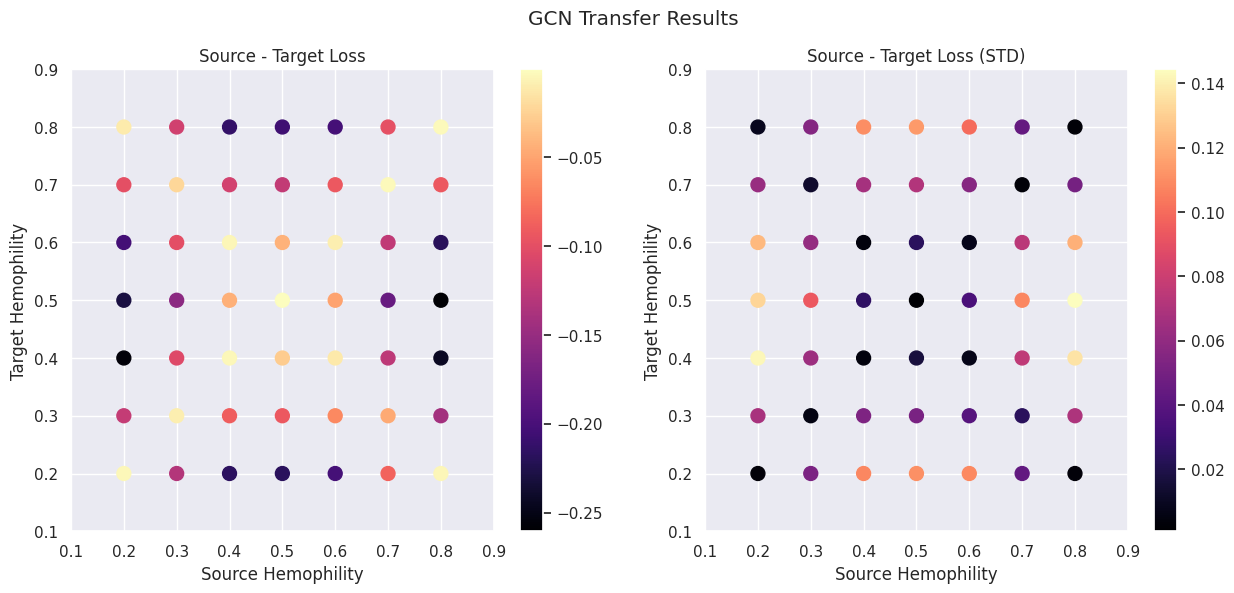

In [50]:
plt.figure(figsize = (15,6))
plt.suptitle('GCN Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'max_transfer_accs', subtitle = 'Source - Target Accuracies')

plt.figure(figsize = (15,6))
plt.suptitle('GCN Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'transfer_loss', subtitle = 'Source - Target Loss')


In [34]:

# Experiment parameters

# data params
n_blocks = 2
n_node_features = 2
data_args = {'block_size': 100, 'n_blocks' : n_blocks, 'n_node_features': n_node_features, 
             'root': './structure_sweep'}


# model params
model_args = {'model_type': 'GSAGE'}
model_hyperparams = {'in_channels' : n_node_features, 'hidden_channels' : 8, 'out_channels' : n_blocks
                     ,'dann_lambda' : 0.5}
model_args['model_hyperparams'] = model_hyperparams


# optimizer params
optimizer_args = {'lr' : 0.02}

# experiment params
n_runs = 5
n_epochs = 30

# sbm blocks probs
step = 0.10
p = 0.8
q = 0.2
n_experiments = 6

experiments_source_probs = create_prob_sweep(p, q, step_size = step, n_steps = n_experiments)
experiments_target_probs = create_prob_sweep(p, q, step_size = step, n_steps = n_experiments)

from itertools import product
experiment_iterator = product(experiments_source_probs, experiments_target_probs)

results = {}
descriptions = []
experiments = []

for experiment in experiment_iterator:
  experiments.append(experiment)
  description = create_description_from_probs(source_probs = experiment[0], target_probs = experiment[1])
  descriptions.append(description)

  data_args['source_probs'] = experiment[0]
  data_args['target_probs'] = experiment[1]

  results[description] = multiple_runs(experiment_description = description, n_runs = n_runs, n_epochs = n_epochs,
                                       model_args = model_args, data_args = data_args, optimizer_args = optimizer_args)

# store_results(results, descriptions, root = f'/content/drive/MyDrive/graphda_experiments/',
#               experiments_name = 'GAT, prob_sweep')


results = get_transfer_results(results, experiments)


100%|██████████| 5/5 [00:01<00:00,  4.65it/s]


In [29]:
print(experiments)

[([0.7, 0.3], [0.7, 0.3]), ([0.7, 0.3], [0.6, 0.4]), ([0.7, 0.3], [0.49999999999999994, 0.5]), ([0.7, 0.3], [0.3999999999999999, 0.6000000000000001]), ([0.6, 0.4], [0.7, 0.3]), ([0.6, 0.4], [0.6, 0.4]), ([0.6, 0.4], [0.49999999999999994, 0.5]), ([0.6, 0.4], [0.3999999999999999, 0.6000000000000001]), ([0.49999999999999994, 0.5], [0.7, 0.3]), ([0.49999999999999994, 0.5], [0.6, 0.4]), ([0.49999999999999994, 0.5], [0.49999999999999994, 0.5]), ([0.49999999999999994, 0.5], [0.3999999999999999, 0.6000000000000001]), ([0.3999999999999999, 0.6000000000000001], [0.7, 0.3]), ([0.3999999999999999, 0.6000000000000001], [0.6, 0.4]), ([0.3999999999999999, 0.6000000000000001], [0.49999999999999994, 0.5]), ([0.3999999999999999, 0.6000000000000001], [0.3999999999999999, 0.6000000000000001])]


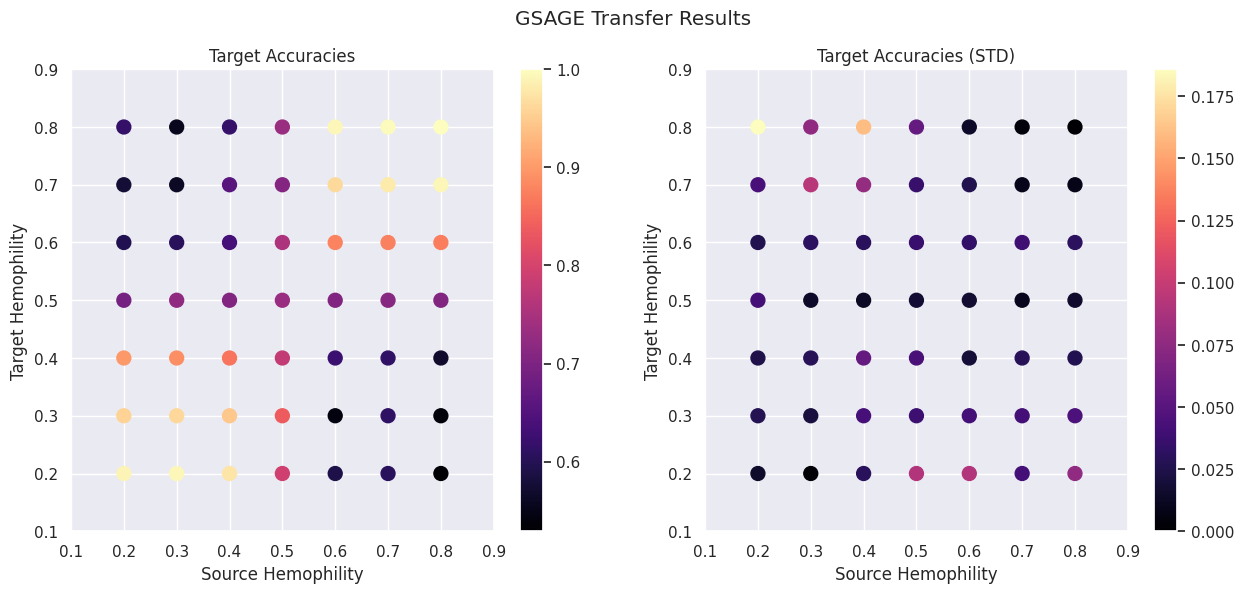

In [37]:
plt.figure(figsize = (15,6))
plt.suptitle('GSAGE Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'max_target_accs', subtitle = 'Target Accuracies')


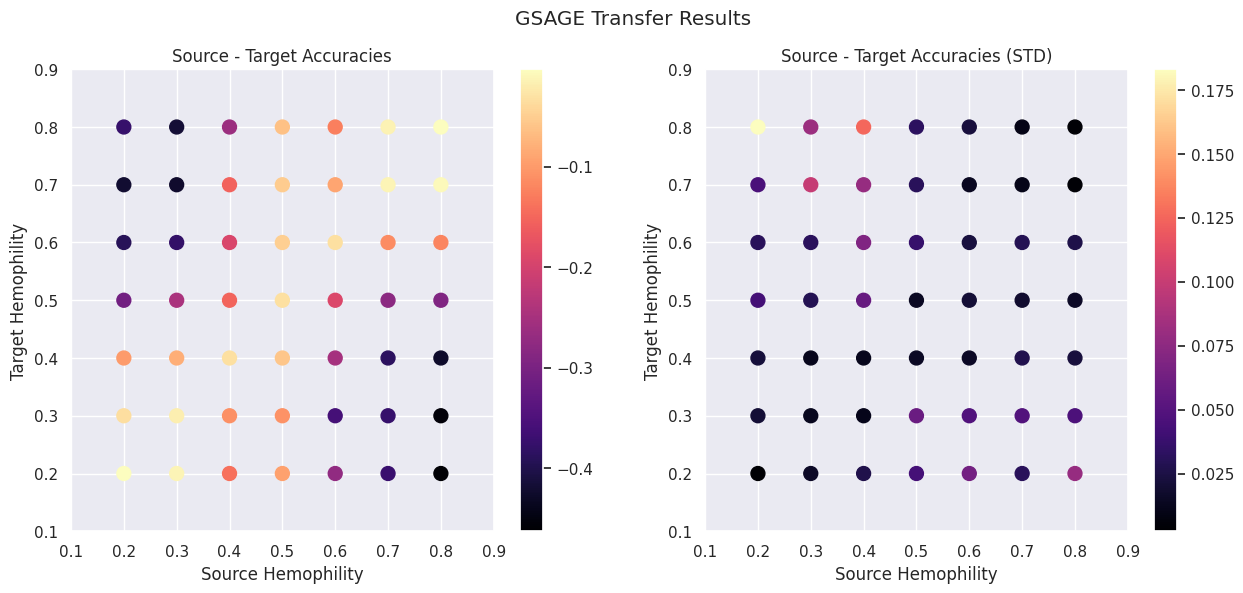

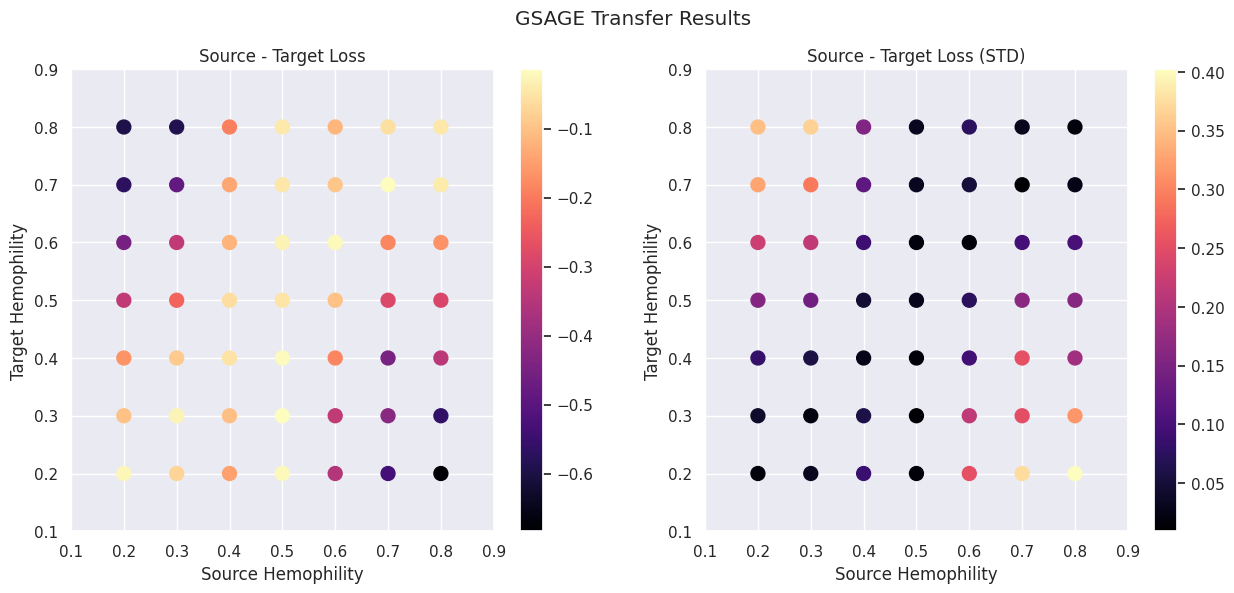

In [38]:
plt.figure(figsize = (15,6))
plt.suptitle('GSAGE Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'max_transfer_accs', subtitle = 'Source - Target Accuracies')

plt.figure(figsize = (15,6))
plt.suptitle('GSAGE Transfer Results')
plot_struct_sweep_histogram(results, experiments, key = 'transfer_loss', subtitle = 'Source - Target Loss')
